# Tree Model

Imagine that I play tennis every Saturday and I always invite a friend to come with me.

Sometimes my friend shows up, sometimes not. For him it depends on a variaty of factors, such as weather, temperature, humidity, wind etc...

I start keeping track of these features and whether or not he showed up to play with me

In [1]:
import numpy as np
import pandas as pd

In [6]:
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data=pd.read_csv('/home/alejandrolive932/Desktop/PYTHON 3/Udemy_Data_Science_and_Machine_Learning/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests/kyphosis.csv')

In [9]:
data.head(2)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


/home/alejandrolive932/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


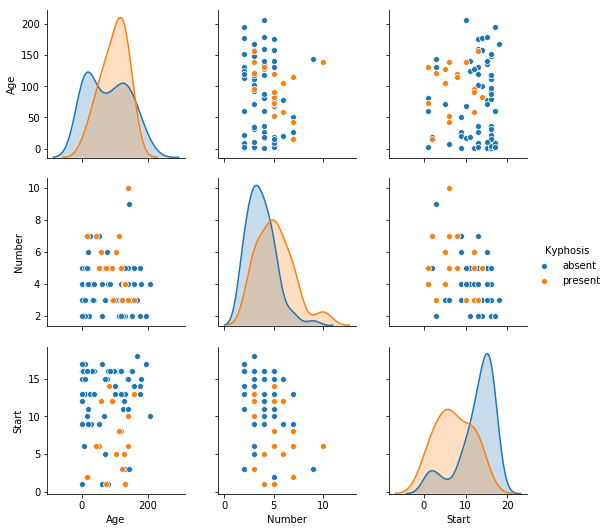

In [12]:
sns.pairplot(data,hue='Kyphosis')

In [72]:
from sklearn.cross_validation import train_test_split as tts

In [73]:
x=data.drop('Kyphosis',axis=1)

In [74]:
y=data['Kyphosis']

In [75]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3)

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
prediction1=dtree.predict(x_test)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
print(confusion_matrix(y_test,prediction1))
print("")
print(classification_report(y_test,prediction1))

[[19  3]
 [ 2  1]]

             precision    recall  f1-score   support

     absent       0.90      0.86      0.88        22
    present       0.25      0.33      0.29         3

avg / total       0.83      0.80      0.81        25



# Random Forest Model 

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
randfor=RandomForestClassifier(n_estimators=200)

In [83]:
randfor.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
prediction2=randfor.predict(x_test)

In [85]:
print(confusion_matrix(y_test,prediction2))
print("")
print(classification_report(y_test,prediction2))

[[17  5]
 [ 1  2]]

             precision    recall  f1-score   support

     absent       0.94      0.77      0.85        22
    present       0.29      0.67      0.40         3

avg / total       0.87      0.76      0.80        25



lets repeat the process above for the tree and random forest model several time storing  the results and plotting them

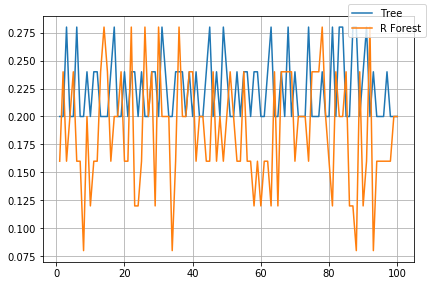

In [118]:
tree_dec=[]
random_dec=[]
for num in range(1,101):
    tree=DecisionTreeClassifier()
    tree.fit(x_train,y_train)
    prediction1=tree.predict(x_test)
    tree_dec.append(np.array(y_test!=prediction1).mean())
    
    rand=RandomForestClassifier(n_estimators=50)
    rand.fit(x_train,y_train)
    prediction2=rand.predict(x_test)
    random_dec.append(np.array(y_test!=prediction2).mean())


y1=np.array(tree_dec)
y2=np.array(random_dec)
x=np.arange(1,101)

fig,axes=plt.subplots()
axes.plot(x,y1,label='Tree')
axes.plot(x,y2,label='R Forest')
axes.grid(True)

fig.legend()
fig.tight_layout()

